<div style="background-color:#5e548e; padding:10px; border-radius:5px;">
    <b>27March2025</b><br><br>
    <b>OW, KB</b><br><br>
    Predicting a continuous variable - cortical depth<br><br>
    Merging OW [get data and example model] and MF [atlas acronym / id and depth function] codes
</div>

<div style="background-color:#277da1; padding:10px; border-radius:5px;">
    <b>Import and load data</b><br><br>
    Described here: <a href="https://github.com/int-brain-lab/paper-ephys-atlas/" target="_blank">GitHub Repository</a>
</div>


In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from one.api import ONE
import ephys_atlas.data

In [2]:
LOCAL_DATA_PATH = Path.home().joinpath("Downloads")
LABEL = "2024_W50"  # or put "latest" # or '2024_W50'
one = ONE(base_url="https://alyx.internationalbrainlab.org", mode='local')
df_raw_features, df_clusters, df_channels, df_probes = ephys_atlas.data.download_tables(label=LABEL, local_path=LOCAL_DATA_PATH, one=one)

<div style="background-color:#277da1; padding:10px; border-radius:5px;">
    <b>Check each table</b><br><br>
    df_raw_features (391333, 29)<br>
    df_clusters<br>
    df_channels<br>
    df_probes<br>
</div>

In [3]:
print(df_raw_features.shape)
print(df_raw_features[0:5])

(384215, 30)
                                                rms_ap  cor_ratio    rms_lf  \
pid                                  channel                                  
00a824c0-e060-495f-9ebc-79c82fef4c67 0        0.000026   0.754190  0.000029   
                                     1        0.000026   0.411007  0.000030   
                                     2        0.000026   0.451987  0.000031   
                                     3        0.000026   0.469155  0.000041   
                                     4        0.000026   0.338838  0.000033   

                                               psd_delta   psd_theta  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -101.787283 -104.159496   
                                     1       -101.573927 -104.459178   
                                     2       -101.712161 -104.223009   
                                     3        -97.225263 -102.353363   
 

In [4]:
print(df_clusters.shape)
print(df_clusters[0:5])

AttributeError: 'NoneType' object has no attribute 'shape'

In [5]:
print(df_channels.shape)
print(df_channels[0:5])

(384768, 11)
                                                     x        y         z  \
pid                                  channel                                
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -0.000614 -0.00325 -0.003389   
                                     1       -0.000614 -0.00325 -0.003389   
                                     2       -0.000614 -0.00325 -0.003368   
                                     3       -0.000614 -0.00325 -0.003368   
                                     4       -0.000614 -0.00325 -0.003347   

                                             acronym  atlas_id  axial_um  \
pid                                  channel                               
00a824c0-e060-495f-9ebc-79c82fef4c67 0           MRN       128      20.0   
                                     1           MRN       128      20.0   
                                     2           MRN       128      40.0   
                                     3           MRN       128     

In [6]:
print(df_probes.shape)
print(df_probes[0:5])

(1002, 10)
                                    pid    pname  x_target  y_target  \
0  00a824c0-e060-495f-9ebc-79c82fef4c67  probe00   -1234.0   -3091.2   
1  00a96dee-1e8b-44cc-9cc3-aca704d2b594  probe01    1002.7   -3749.6   
2  00c425fd-ec3e-4cd2-b8af-c0bc0c4bdd44  probe00   -3789.0   -1525.0   
3  0106dd46-8489-4346-880a-83b779d18aaf  probe01   -1804.0   -3749.9   
4  0143d3fe-79c2-4922-8332-62c3e4e0ba85  probe00   -1287.0   -3238.0   

   z_target  depth_target  theta_target  phi_target  roll_target histology  
0    -628.0        3425.0          15.0       180.0          0.0       alf  
1    -989.1        5841.3          17.0         0.0          0.0       alf  
2       0.0        5000.0           5.0         0.0          0.0       alf  
3    -490.8        4946.7          10.0         0.0          0.0    traced  
4    -473.0        4550.0          10.0         0.0        270.0       alf  


In [7]:
df_raw_features.columns

Index(['rms_ap', 'cor_ratio', 'rms_lf', 'psd_delta', 'psd_theta', 'psd_alpha',
       'psd_beta', 'psd_gamma', 'psd_lfp', 'rms_lf_csd', 'psd_delta_csd',
       'psd_theta_csd', 'psd_alpha_csd', 'psd_beta_csd', 'psd_gamma_csd',
       'psd_lfp_csd', 'alpha_mean', 'alpha_std', 'spike_count',
       'peak_time_secs', 'peak_val', 'trough_time_secs', 'trough_val',
       'tip_time_secs', 'tip_val', 'recovery_time_secs',
       'depolarisation_slope', 'repolarisation_slope', 'recovery_slope',
       'polarity'],
      dtype='object')

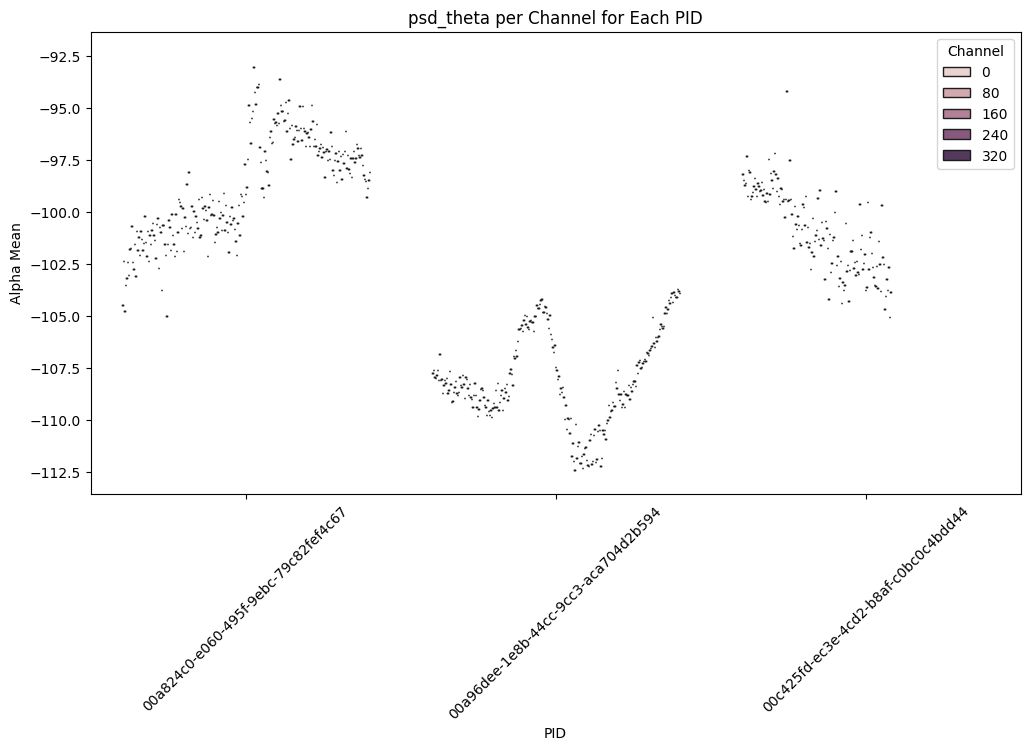

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_raw_features is your DataFrame

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_raw_features[0:1000], x="pid", y="psd_theta", hue="channel")

plt.xticks(rotation=45)
plt.xlabel("PID")
plt.ylabel("Alpha Mean")
plt.title("psd_theta per Channel for Each PID")
plt.legend(title="Channel")
plt.show()


In [10]:
df_voltage = df_raw_features.merge(df_channels, left_index=True, right_index=True)


## %%
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
# sns.countplot(data=df_clusters, x="label", palette="deep")

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
df_voltage

rms_ap  cor_ratio    rms_lf  \
pid                                  channel                                  
00a824c0-e060-495f-9ebc-79c82fef4c67 0        0.000026   0.754190  0.000029   
                                     1        0.000026   0.411007  0.000030   
                                     2        0.000026   0.451987  0.000031   
                                     3        0.000026   0.469155  0.000041   
                                     4        0.000026   0.338838  0.000033   
...                                                ...        ...       ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379      0.000038   0.788894  0.000045   
                                     380      0.000038   0.766668  0.000047   
                                     381      0.000038   0.744558  0.000046   
                                     382      0.000038   0.696702  0.000048   
                                     383      0.000038   0.695542  0.000046   

                                               psd_delta   psd_theta  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -101.787283 -104.159496   
                                     1       -101.573927 -104.459178   
                                     2       -101.712161 -104.223009   
                                     3        -97.225263 -102.353363   
                                     4        -99.494953 -104.781015   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379      -96.893853 -101.622061   
                                     380      -96.756403 -101.407902   
                                     381      -97.154323 -101.746486   
                                     382      -96.286040 -101.416863   
                                     383      -97.056808 -101.644340   

                                               psd_alpha    psd_beta  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -105.973834 -112.510019   
                                     1       -106.397486 -112.693430   
                                     2       -106.204256 -112.325320   
                                     3       -104.408635 -110.429818   
                                     4       -106.740744 -112.371962   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379     -104.861699 -110.253048   
                                     380     -104.768071 -110.041355   
                                     381     -104.903059 -110.157332   
                                     382     -104.826851 -109.906594   
                                     383     -105.094410 -110.118663   

                                               psd_gamma     psd_lfp  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -115.888470 -112.043098   
                                     1       -115.906262 -111.789864   
                                     2       -115.555288 -111.863034   
                                     3       -114.125412 -109.164580   
                                     4       -115.086073 -111.196320   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379     -113.620168 -108.627753   
                                     380     -113.450934 -108.257603   
                                     381     -113.669899 -108.536956   
                                     382     -113.303112 -108.127909   
                                     383     -113.458966 -108.403703   

                                                rms_lf_csd  ...         y  \
pid                                  channel                ...             
00a824c0-e060-495f-9ebc-79c82fef4c67 0        5.301135e

In [12]:

from pathlib import Path

from one.api import ONE
from one.remote import aws
import ephys_atlas.data

config = ephys_atlas.data.get_config()
LOCAL_DATA_PATH = Path(config["paths"]["raw-samples"])

one = ONE(base_url="https://alyx.internationalbrainlab.org", mode="remote")
s3, bucket_name = aws.get_s3_from_alyx(alyx=one.alyx)


pids = [
    "1a276285-8b0e-4cc9-9f0a-a3a002978724",
    "1e104bf4-7a24-4624-a5b2-c2c8289c0de7",
    "5d570bf6-a4c6-4bf1-a14b-2c878c84ef0e",
    "5f7766ce-8e2e-410c-9195-6bf089fea4fd",
    "6638cfb3-3831-4fc2-9327-194b76cf22e1",
    "749cb2b7-e57e-4453-a794-f6230e4d0226",
    "d7ec0892-0a6c-4f4f-9d8f-72083692af5c",
    "da8dfec1-d265-44e8-84ce-6ae9c109b8bd",
    "dab512bd-a02d-4c1f-8dbc-9155a163efc0",
    "dc7e9403-19f7-409f-9240-05ee57cb7aea",
    "e8f9fba4-d151-4b00-bee7-447f0f3e752c",
    "eebcaf65-7fa4-4118-869d-a084e84530e2",
    "fe380793-8035-414e-b000-09bfe5ece92a",
]

# downloads all pids (52 Gb total)
if False:
    aws.s3_download_folder(
        "resources/ephys-atlas-sample", LOCAL_DATA_PATH, s3=s3, bucket_name=bucket_name
    )

# downloads one pid at a time (3 to 7 Gb a pop)
if False:
    pid = pids[5]
    aws.s3_download_folder(
        f"resources/ephys-atlas-sample/{pid}",
        LOCAL_DATA_PATH.joinpath(pid),
        s3=s3,
        bucket_name=bucket_name,
    )

In [13]:
from pathlib import Path
import pandas as pd
import numpy as np

import sklearn.metrics
from xgboost import XGBClassifier  # pip install xgboost  # https://xgboost.readthedocs.io/en/stable/prediction.html

from iblutil.numerical import ismember
import ephys_atlas.encoding
import ephys_atlas.decoding
import ephys_atlas.anatomy
import ephys_atlas.data
import ephys_atlas.features

In [14]:

import ephys_atlas.data
from one.api import ONE
one = ONE(base_url='https://alyx.internationalbrainlab.org', mode='remote')
df_voltage, _, df_channels, df_probes = ephys_atlas.data.download_tables(local_path='/home/ibladmin/Downloads/2024_W50/', label='2024_W50', one=one)


In [15]:
# %%
from pathlib import Path
import pandas as pd
import numpy as np

import sklearn.metrics
from xgboost import XGBClassifier  # pip install xgboost  # https://xgboost.readthedocs.io/en/stable/prediction.html

from iblutil.numerical import ismember
import ephys_atlas.encoding
import ephys_atlas.decoding
import ephys_atlas.anatomy
import ephys_atlas.data
import ephys_atlas.features

In [16]:

brain_atlas = ephys_atlas.anatomy.AllenAtlas()  # Accuracy: 0.5536619920744102

In [17]:
path_features = Path('/home/ibladmin/Downloads/2024_W50/')  # mac

In [18]:
path_models = path_features.parents[1].joinpath('models')

In [19]:
path_models

PosixPath('/home/ibladmin/models')

In [20]:
path_models.mkdir(exist_ok=True)

In [156]:
df_features = pd.read_parquet(path_features / 'raw_ephys_features_denoised.pqt')

In [157]:
df_features = df_features.merge(pd.read_parquet(path_features / 'channels.pqt'), how='inner', right_index=True, left_index=True)

In [158]:
df_features = df_features.merge(pd.read_parquet(path_features / 'channels_labels.pqt').fillna(0), how='inner', right_index=True, left_index=True)

In [159]:
df_features

rms_ap  cor_ratio    rms_lf  \
pid                                  channel                                  
00a824c0-e060-495f-9ebc-79c82fef4c67 0        0.000026   0.754190  0.000029   
                                     1        0.000026   0.411007  0.000030   
                                     2        0.000026   0.451987  0.000031   
                                     3        0.000026   0.469155  0.000041   
                                     4        0.000026   0.338838  0.000033   
...                                                ...        ...       ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379      0.000038   0.788894  0.000045   
                                     380      0.000038   0.766668  0.000047   
                                     381      0.000038   0.744558  0.000046   
                                     382      0.000038   0.696702  0.000048   
                                     383      0.000038   0.695542  0.000046   

                                               psd_delta   psd_theta  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -101.787283 -104.159496   
                                     1       -101.573927 -104.459178   
                                     2       -101.712161 -104.223009   
                                     3        -97.225263 -102.353363   
                                     4        -99.494953 -104.781015   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379      -96.893853 -101.622061   
                                     380      -96.756403 -101.407902   
                                     381      -97.154323 -101.746486   
                                     382      -96.286040 -101.416863   
                                     383      -97.056808 -101.644340   

                                               psd_alpha    psd_beta  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -105.973834 -112.510019   
                                     1       -106.397486 -112.693430   
                                     2       -106.204256 -112.325320   
                                     3       -104.408635 -110.429818   
                                     4       -106.740744 -112.371962   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379     -104.861699 -110.253048   
                                     380     -104.768071 -110.041355   
                                     381     -104.903059 -110.157332   
                                     382     -104.826851 -109.906594   
                                     383     -105.094410 -110.118663   

                                               psd_gamma     psd_lfp  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -115.888470 -112.043098   
                                     1       -115.906262 -111.789864   
                                     2       -115.555288 -111.863034   
                                     3       -114.125412 -109.164580   
                                     4       -115.086073 -111.196320   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379     -113.620168 -108.627753   
                                     380     -113.450934 -108.257603   
                                     381     -113.669899 -108.536956   
                                     382     -113.303112 -108.127909   
                                     383     -113.458966 -108.403703   

                                                rms_lf_csd  ...         z  \
pid                                  channel                ...             
00a824c0-e060-495f-9ebc-79c82fef4c67 0        5.301135e

In [160]:
ephys_atlas.data.load_tables(local_path=path_features)

(                                                rms_ap  cor_ratio    rms_lf  \
 pid                                  channel                                  
 00a824c0-e060-495f-9ebc-79c82fef4c67 0        0.000026   0.754190  0.000029   
                                      1        0.000026   0.411007  0.000030   
                                      2        0.000026   0.451987  0.000031   
                                      3        0.000026   0.469155  0.000041   
                                      4        0.000026   0.338838  0.000033   
 ...                                                ...        ...       ...   
 ffb1b072-2de7-44a4-8115-5799b9866382 379      0.000038   0.788894  0.000045   
                                      380      0.000038   0.766668  0.000047   
                                      381      0.000038   0.744558  0.000046   
                                      382      0.000038   0.696702  0.000048   
                                      38

In [161]:
FEATURE_SET = ['raw_lf', 'raw_lf_csd', 'raw_ap', 'localisation', 'waveforms', 'micro-manipulator']
FEATURE_SET = ['raw_lf', 'raw_lf_csd', 'raw_ap', 'micro-manipulator']
x_list = ephys_atlas.features.voltage_features_set(FEATURE_SET)

In [162]:

df_features['outside'] = df_features['labels'] == 3
x_list.append('outside')



In [163]:
aids = brain_atlas.get_labels(df_features.loc[:, ['x', 'y', 'z']].values, mode='clip')
df_features['Allen_id'] = aids
df_features['Cosmos_id'] = brain_atlas.regions.remap(aids, 'Allen', 'Cosmos')
df_features['Beryl_id'] = brain_atlas.regions.remap(aids, 'Allen', 'Beryl')

TRAIN_LABEL = 'Cosmos_id'  # ['Beryl_id', 'Cosmos_id']

In [164]:
test_sets = {
    'benchmark': ephys_atlas.data.BENCHMARK_PIDS,
    'nemo': ephys_atlas.data.NEMO_TEST_PIDS,
}
all_classes = np.unique(df_features.loc[:, TRAIN_LABEL])

In [165]:
def train(test_idx, fold_label):

    train_idx = ~test_idx
    print(f"{fold_label}: {df_features.shape[0]} channels", f'training set {np.sum(test_idx) / test_idx.size}')
    df_features.loc[train_idx, :].groupby(TRAIN_LABEL).count()
    x_train = df_features.loc[train_idx, x_list].values
    x_test = df_features.loc[test_idx, x_list].values
    y_train = df_features.loc[train_idx, TRAIN_LABEL].values
    y_test = df_features.loc[test_idx, TRAIN_LABEL].values
    df_benchmarks = df_features.loc[ismember(df_features.index.get_level_values(0), ephys_atlas.data.BENCHMARK_PIDS)[0], :].copy()
    df_test = df_features.loc[test_idx, :].copy()
    classes = np.unique(df_features.loc[train_idx, TRAIN_LABEL])

    _, iy_train = ismember(y_train, classes)
    _, iy_test = ismember(y_test, classes)
    # 0.5376271321378102
    #  create model instance
    classifier = XGBClassifier(device='gpu', verbosity=2)

    # fit model
    classifier.fit(x_train, iy_train)
    # make predictions
    y_pred = classes[classifier.predict(x_test)]
    df_test[f'cosmos_prediction'] = classes[classifier.predict(df_test.loc[:, x_list].values)]
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='true')  # row: true, col: predicted
    print(f"{fold_label} Accuracy: {accuracy}")

    np.testing.assert_array_equal(classes, all_classes)
    return classifier.predict_proba(x_test), classifier, accuracy


In [31]:

# IDENTIFIER = 'lid-basket-sense'
# IDENTIFIER = 'voter-snap-pudding'
# n_folds = 5
# all_pids = np.array(df_features.index.get_level_values(0).unique())
# np.random.seed(12345)
# np.random.shuffle(all_pids)
# ifold = np.floor(np.arange(len(all_pids)) / len(all_pids) * n_folds)

# df_predictions = pd.DataFrame(index=df_features.index, columns=list(all_classes))
# for i in range(n_folds):
#     test_pids = all_pids[ifold == i]
#     test_idx = np.isin(df_features.index.get_level_values(0), test_pids)
#     probas, classifier, accuracy = train(test_idx=test_idx, fold_label=f'fold {i}')
#     df_predictions.loc[test_idx, all_classes] = probas
#     meta = dict(
#         RANDOM_SEED=713705,
#         VINTAGE="2024_W50",
#         REGION_MAP="Cosmos",
#         FEATURES=x_list,
#         CLASSES=[int(c) for c in all_classes],
#         ACCURACY=accuracy,
#         )
#     path_model = ephys_atlas.decoding.save_model(path_models, classifier, meta, subfolder=f'FOLD{i :02d}', identifier=IDENTIFIER)

# df_predictions.to_parquet(path_models / 'predictions_Cosmos.pqt')

fold 0: 384215 channels training set 0.2008120453391981
[15:24:07] INFO: /workspace/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (307060, 20, 6141200).
[15:24:07] INFO: /workspace/src/data/ellpack_page.cu:167: Ellpack is dense.


/mnt/h0/kb/code_kcenia/.venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:24:11] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


fold 0 Accuracy: 0.6327911347287927
fold 1: 384215 channels training set 0.19975013989563134
[15:24:14] INFO: /workspace/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (307468, 20, 6149360).
[15:24:14] INFO: /workspace/src/data/ellpack_page.cu:167: Ellpack is dense.
fold 1 Accuracy: 0.6134311438883605
fold 2: 384215 channels training set 0.20078601824499304
[15:24:20] INFO: /workspace/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (307070, 20, 6141400).
[15:24:20] INFO: /workspace/src/data/ellpack_page.cu:167: Ellpack is dense.
fold 2 Accuracy: 0.6486356860457579
fold 3: 384215 channels training set 0.19982041304998505
[15:24:26] INFO: /workspace/src/data/iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (307441, 20, 6148820).
[15:24:26] INFO: /workspace/src/data/ellpack_page.cu:167: Ellpack is dense.
fold 3 Accuracy: 0.6651861307213379
fold 4: 384215 channels training set 0.19883138347019247
[15:24:

In [166]:
df_features.columns

Index(['rms_ap', 'cor_ratio', 'rms_lf', 'psd_delta', 'psd_theta', 'psd_alpha',
       'psd_beta', 'psd_gamma', 'psd_lfp', 'rms_lf_csd', 'psd_delta_csd',
       'psd_theta_csd', 'psd_alpha_csd', 'psd_beta_csd', 'psd_gamma_csd',
       'psd_lfp_csd', 'alpha_mean', 'alpha_std', 'spike_count',
       'peak_time_secs', 'peak_val', 'trough_time_secs', 'trough_val',
       'tip_time_secs', 'tip_val', 'recovery_time_secs',
       'depolarisation_slope', 'repolarisation_slope', 'recovery_slope',
       'polarity', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um',
       'lateral_um', 'x_target', 'y_target', 'z_target', 'atlas_id_target',
       'labels', 'outside', 'Allen_id', 'Cosmos_id', 'Beryl_id'],
      dtype='object')

In [63]:
#https://github.com/int-brain-lab/ibldevtools/blob/581c407909a5c3f983cd6e3cdb4d66628a59f1d0/Mayo/2020-12-02_histology_slice_repeated_site.py#L23 
from pathlib import Path

import numpy as np

import ibllib.atlas as atlas
# from oneibl.one import ONE
import brainbox.io.one as bbone
# import atlaselectrophysiology.load_histology as hist
import matplotlib.pyplot as plt
from ibllib.pipes import ephys_alignment
import matplotlib
import os

one = ONE()
ba = atlas.AllenAtlas(25)

# Find eid of interest
traj = one.alyx.rest('trajectories', 'list', provenance='Planned',
                     x=-2243, y=-2000,  # repeated site coordinate
                     project='ibl_neuropixel_brainwide_01',
                     django='probe_insertion__session__qc__lt,'
                            '50,probe_insertion__json__extended_qc__tracing_exists,True,'
                            'probe_insertion__json__extended_qc__alignment_resolved,True')
probe_insertion = [t['probe_insertion'] for t in traj]

/mnt/h0/kb/code_kcenia/.venv/lib/python3.10/site-packages/ibllib/atlas/atlas.py:13: DeprecationWarning: ibllib.atlas.atlas.AllenAtlas is deprecated. Use iblatlas.atlas.AllenAtlas instead
  warnings.warn(warning_text, DeprecationWarning)


In [64]:
probe_insertion

['0b8ea3ec-e75b-41a1-9442-64f5fbc11a5a',
 'e42e948c-3154-45cb-bf52-408b7cda0f2f',
 'ce397420-3cd2-4a55-8fd1-5e28321981f4',
 'e4ce2e94-6fb9-4afe-acbf-6f5a3498602e',
 'b83407f8-8220-46f9-9b90-a4c9f150c572',
 '92822789-608f-44a6-ad64-fe549402b2df',
 'f4bd76a6-66c9-41f3-9311-6962315f8fc8',
 '3d3d5a5e-df26-43ee-80b6-2d72d85668a5',
 'e31b4e39-e350-47a9-aca4-72496d99ff2a',
 'f8d0ecdc-b7bd-44cc-b887-3d544e24e561',
 '6fc4d73c-2071-43ec-a756-c6c6d8322c8b',
 '4836a465-c691-4852-a0b1-dcd2b1ce38a1',
 '1e176f17-d00f-49bb-87ff-26d237b525f1',
 '92033a0c-5a14-471b-b131-d43c72ca5d7a',
 '16799c7a-e395-435d-a4c4-a678007e1550',
 'b25799a5-09e8-4656-9c1b-44bc9cbb5279',
 'c17772a9-21b5-49df-ab31-3017addea12e',
 '22212d26-a167-45fb-9963-35ecd003e8a2',
 'ef3d059a-59d5-4870-b355-563a8d7cfd2d',
 '0851db85-2889-4070-ac18-a40e8ebd96ba',
 'eeb27b45-5b85-4e5c-b6ff-f639ca5687de',
 '69f42a9c-095d-4a25-bca8-61a9869871d3',
 '8c732bf2-639d-496c-bf82-464bc9c2d54b',
 'f03b61b4-6b13-479d-940f-d1608eb275cc',
 'b2746c16-7152-

In [65]:
len(probe_insertion)

95

In [66]:
df_features

,pid,channel,rms_ap,cor_ratio,rms_lf,psd_delta,psd_theta,psd_alpha,psd_beta,psd_gamma,...,lateral_um,x_target,y_target,z_target,atlas_id_target,labels,outside,Allen_id,Cosmos_id,Beryl_id
0,00a824c0-e060-495f-9ebc-79c82fef4c67,0,0.000026,0.754190,0.000029,-101.787283,-104.159496,-105.973834,-112.510019,-115.888470,...,43.0,-0.000352,-0.002844,-0.003299,795,2.0,False,128,313,128
1,00a824c0-e060-495f-9ebc-79c82fef4c67,1,0.000026,0.411007,0.000030,-101.573927,-104.459178,-106.397486,-112.693430,-115.906262,...,11.0,-0.000352,-0.002844,-0.003299,795,0.0,False,128,313,128
2,00a824c0-e060-495f-9ebc-79c82fef4c67,2,0.000026,0.451987,0.000031,-101.712161,-104.223009,-106.204256,-112.325320,-115.555288,...,59.0,-0.000357,-0.002844,-0.003279,795,0.0,False,128,313,128
3,00a824c0-e060-495f-9ebc-79c82fef4c67,3,0.000026,0.469155,0.000041,-97.225263,-102.353363,-104.408635,-110.429818,-114.125412,...,27.0,-0.000357,-0.002844,-0.003279,795,0.0,False,128,313,128
4,00a824c0-e060-495f-9ebc-79c82fef4c67,4,0.000026,0.338838,0.000033,-99.494953,-104.781015,-106.740744,-112.371962,-115.086073,...,43.0,-0.000362,-0.002844,-0.003260,795,0.0,False,128,313,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384210,ffb1b072-2de7-44a4-8115-5799b9866382,379,0.000038,0.788894,0.000045,-96.893853,-101.622061,-104.861699,-110.253048,-113.620168,...,27.0,0.001347,-0.006209,-0.003445,512,0.0,False,1025,512,1025
384211,ffb1b072-2de7-44a4-8115-5799b9866382,380,0.000038,0.766668,0.000047,-96.756403,-101.407902,-104.768071,-110.041355,-113.450934,...,43.0,0.001350,-0.006209,-0.003426,512,0.0,False,1025,512,1025
384212,ffb1b072-2de7-44a4-8115-5799b9866382,381,0.000038,0.744558,0.000046,-97.154323,-101.746486,-104.903059,-110.157332,-113.669899,...,11.0,0.001350,-0.006209,-0.003426,512,0.0,False,1025,512,1025
384213,ffb1b072-2de7-44a4-8115-5799b9866382,382,0.000038,0.696702,0.000048,-96.286040,-101.416863,-104.826851,-109.906594,-113.303112,...,59.0,0.001353,-0.006209,-0.003406,512,0.0,False,1025,512,1025


In [67]:
df_voltage

rms_ap  cor_ratio    rms_lf  \
pid                                  channel                                  
00a824c0-e060-495f-9ebc-79c82fef4c67 0        0.000026   0.754190  0.000029   
                                     1        0.000026   0.411007  0.000030   
                                     2        0.000026   0.451987  0.000031   
                                     3        0.000026   0.469155  0.000041   
                                     4        0.000026   0.338838  0.000033   
...                                                ...        ...       ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379      0.000038   0.788894  0.000045   
                                     380      0.000038   0.766668  0.000047   
                                     381      0.000038   0.744558  0.000046   
                                     382      0.000038   0.696702  0.000048   
                                     383      0.000038   0.695542  0.000046   

                                               psd_delta   psd_theta  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -101.787283 -104.159496   
                                     1       -101.573927 -104.459178   
                                     2       -101.712161 -104.223009   
                                     3        -97.225263 -102.353363   
                                     4        -99.494953 -104.781015   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379      -96.893853 -101.622061   
                                     380      -96.756403 -101.407902   
                                     381      -97.154323 -101.746486   
                                     382      -96.286040 -101.416863   
                                     383      -97.056808 -101.644340   

                                               psd_alpha    psd_beta  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -105.973834 -112.510019   
                                     1       -106.397486 -112.693430   
                                     2       -106.204256 -112.325320   
                                     3       -104.408635 -110.429818   
                                     4       -106.740744 -112.371962   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379     -104.861699 -110.253048   
                                     380     -104.768071 -110.041355   
                                     381     -104.903059 -110.157332   
                                     382     -104.826851 -109.906594   
                                     383     -105.094410 -110.118663   

                                               psd_gamma     psd_lfp  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -115.888470 -112.043098   
                                     1       -115.906262 -111.789864   
                                     2       -115.555288 -111.863034   
                                     3       -114.125412 -109.164580   
                                     4       -115.086073 -111.196320   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379     -113.620168 -108.627753   
                                     380     -113.450934 -108.257603   
                                     381     -113.669899 -108.536956   
                                     382     -113.303112 -108.127909   
                                     383     -113.458966 -108.403703   

                                                rms_lf_csd  ...  peak_val  \
pid                                  channel                ...             
00a824c0-e060-495f-9ebc-79c82fef4c67 0        5.301135e

In [68]:
import pandas as pd

df_features = df_features.reset_index()

# Filter df_features to keep only rows where 'pid' is in probe_insertion
df_features_rs = df_features[df_features['pid'].isin(probe_insertion)]

# Display the filtered dataframe
print(df_features_rs)


         index                                   pid  channel    rms_ap  \
4608      4608  02cc03e4-8015-4050-bb42-6c832091febb        0  0.000021   
4609      4609  02cc03e4-8015-4050-bb42-6c832091febb        1  0.000021   
4610      4610  02cc03e4-8015-4050-bb42-6c832091febb        2  0.000021   
4611      4611  02cc03e4-8015-4050-bb42-6c832091febb        3  0.000021   
4612      4612  02cc03e4-8015-4050-bb42-6c832091febb        4  0.000021   
...        ...                                   ...      ...       ...   
383443  383443  febb430e-2d50-4f83-87a0-b5ffbb9a4943      379  0.000010   
383444  383444  febb430e-2d50-4f83-87a0-b5ffbb9a4943      380  0.000010   
383445  383445  febb430e-2d50-4f83-87a0-b5ffbb9a4943      381  0.000010   
383446  383446  febb430e-2d50-4f83-87a0-b5ffbb9a4943      382  0.000010   
383447  383447  febb430e-2d50-4f83-87a0-b5ffbb9a4943      383  0.000010   

        cor_ratio    rms_lf   psd_delta   psd_theta   psd_alpha    psd_beta  \
4608     0.557105  0

In [69]:
df_features_rs = df_features_rs.reset_index()  

In [70]:
df_features_rs


,level_0,index,pid,channel,rms_ap,cor_ratio,rms_lf,psd_delta,psd_theta,psd_alpha,...,lateral_um,x_target,y_target,z_target,atlas_id_target,labels,outside,Allen_id,Cosmos_id,Beryl_id
0,4608,4608,02cc03e4-8015-4050-bb42-6c832091febb,0,0.000021,0.557105,0.000027,-101.823416,-104.897197,-108.029052,...,43.0,-0.001159,-0.001848,-0.004385,685,0.0,False,128,313,128
1,4609,4609,02cc03e4-8015-4050-bb42-6c832091febb,1,0.000021,0.499335,0.000028,-101.325126,-104.684551,-107.898570,...,11.0,-0.001159,-0.001848,-0.004385,685,0.0,False,128,313,128
2,4610,4610,02cc03e4-8015-4050-bb42-6c832091febb,2,0.000021,0.512788,0.000026,-101.866288,-105.270339,-108.259699,...,59.0,-0.001164,-0.001848,-0.004366,685,0.0,False,128,313,128
3,4611,4611,02cc03e4-8015-4050-bb42-6c832091febb,3,0.000021,0.540980,0.000027,-101.616987,-104.816437,-108.255451,...,27.0,-0.001164,-0.001848,-0.004366,685,0.0,False,128,313,128
4,4612,4612,02cc03e4-8015-4050-bb42-6c832091febb,4,0.000021,0.553821,0.000026,-101.871551,-104.948605,-108.252515,...,43.0,-0.001169,-0.001848,-0.004346,685,0.0,False,128,313,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36469,383443,383443,febb430e-2d50-4f83-87a0-b5ffbb9a4943,379,0.000010,0.276007,0.000093,-90.390155,-92.594649,-96.015475,...,27.0,-0.002147,-0.001840,-0.000519,312782558,0.0,False,721,315,385
36470,383444,383444,febb430e-2d50-4f83-87a0-b5ffbb9a4943,380,0.000010,0.274785,0.000092,-90.469792,-92.616869,-96.139506,...,43.0,-0.002152,-0.001840,-0.000500,312782558,0.0,False,721,315,385
36471,383445,383445,febb430e-2d50-4f83-87a0-b5ffbb9a4943,381,0.000010,0.282201,0.000093,-90.335250,-92.631347,-96.102832,...,11.0,-0.002152,-0.001840,-0.000500,312782558,0.0,False,721,315,385
36472,383446,383446,febb430e-2d50-4f83-87a0-b5ffbb9a4943,382,0.000010,0.270047,0.000091,-90.656129,-92.760258,-96.238402,...,59.0,-0.002157,-0.001840,-0.000481,312782554,0.0,False,721,315,385


In [71]:
# https://int-brain-lab.github.io/iblenv/notebooks_external/atlas_mapping.html
# import brain atlas and brain regions objects
from iblatlas.atlas import AllenAtlas
from iblatlas.regions import BrainRegions
ba = AllenAtlas()
br = BrainRegions() # br is also an attribute of ba so could to br = ba.regions

cosmos_indices = np.unique(br.mappings['Cosmos'])
br.acronym[cosmos_indices]


array(['void', 'root', 'Isocortex', 'OLF', 'HPF', 'CTXsp', 'CNU', 'TH',
       'HY', 'MB', 'HB', 'CB'], dtype=object)

In [72]:
# First find the atlas_id associated with acronym MDm
atlas_id = br.acronym2id('Isocortex')
# Then find the acronyms of the ancestors of this region
print(br.ancestors(ids=atlas_id)['acronym'])

['root' 'grey' 'CH' 'CTX' 'CTXpl' 'Isocortex']


In [73]:
print(br.acronym2acronym('Isocortex', mapping='Allen'))

['Isocortex']


In [74]:
print(br.acronym2acronym('Isocortex', mapping='Cosmos'))

['Isocortex']


In [75]:
print(br.acronym2id('Isocortex', mapping='Cosmos'))
print(br.acronym2id('Isocortex', mapping='Beryl'))
print(br.acronym2id('Isocortex', mapping='Allen'))

[315]
[997]
[315]


In [76]:
df_features_rs.Allen_id.unique()

array([      128,       215,       313,       916,      1009,     10703,
             632,       382,       466,       971, 484682520,       940,
       312782570, 312782566, 312782562, 560581551,       549,       218,
            1029,     10704,       986,       441,      1046,       433,
             401,      1066,       281,         0,       997, 312782558,
       312782554, 312782550,       797,       804,      1097,       697,
             733,      1020,       463, 484682512, 496345668, 496345672,
       496345664, 563807435,       325,       422,      1088,       469,
             257,       565,       501,        41,       805,       628,
            1089,       502, 484682470,       443,        17,        10,
             305,        33,       778,       725,       721,       214,
             146,      1052,       246,      1061,       821,       718,
       484682524,       423,       155, 484682516,       461,         9,
            1111,      1086,       670,       593, 

In [77]:
df_features_rs.shape

(36474, 50)

In [78]:
df_features_rs_isocortex_cosmos = df_features_rs[df_features_rs['Cosmos_id'] == 315]

In [85]:
df_features_rs_isocortex_cosmos = df_features_rs_isocortex_cosmos.reset_index(drop=True)
df_features_rs_isocortex_cosmos.shape

(6369, 50)

In [86]:
df_features_rs_isocortex_cosmos

,level_0,index,pid,channel,rms_ap,cor_ratio,rms_lf,psd_delta,psd_theta,psd_alpha,...,lateral_um,x_target,y_target,z_target,atlas_id_target,labels,outside,Allen_id,Cosmos_id,Beryl_id
0,4960,4960,02cc03e4-8015-4050-bb42-6c832091febb,352,0.000011,0.366232,0.000136,-88.026229,-89.106191,-92.053162,...,43.0,-0.002029,-0.001848,-0.000974,9,0.0,False,312782570,315,312782546
1,4961,4961,02cc03e4-8015-4050-bb42-6c832091febb,353,0.000011,0.312016,0.000136,-88.131057,-89.135018,-92.075441,...,11.0,-0.002029,-0.001848,-0.000974,9,0.0,False,312782570,315,312782546
2,4962,4962,02cc03e4-8015-4050-bb42-6c832091febb,354,0.000011,0.280382,0.000136,-88.074661,-89.185030,-92.151970,...,59.0,-0.002034,-0.001848,-0.000955,9,0.0,False,312782566,315,312782546
3,4963,4963,02cc03e4-8015-4050-bb42-6c832091febb,355,0.000011,0.369324,0.000135,-88.304842,-89.215874,-92.099564,...,27.0,-0.002034,-0.001848,-0.000955,9,0.0,False,312782566,315,312782546
4,4964,4964,02cc03e4-8015-4050-bb42-6c832091febb,356,0.000012,0.338646,0.000135,-88.281858,-89.237349,-92.184661,...,43.0,-0.002039,-0.001848,-0.000936,9,0.0,False,312782566,315,312782546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,383443,383443,febb430e-2d50-4f83-87a0-b5ffbb9a4943,379,0.000010,0.276007,0.000093,-90.390155,-92.594649,-96.015475,...,27.0,-0.002147,-0.001840,-0.000519,312782558,0.0,False,721,315,385
6365,383444,383444,febb430e-2d50-4f83-87a0-b5ffbb9a4943,380,0.000010,0.274785,0.000092,-90.469792,-92.616869,-96.139506,...,43.0,-0.002152,-0.001840,-0.000500,312782558,0.0,False,721,315,385
6366,383445,383445,febb430e-2d50-4f83-87a0-b5ffbb9a4943,381,0.000010,0.282201,0.000093,-90.335250,-92.631347,-96.102832,...,11.0,-0.002152,-0.001840,-0.000500,312782558,0.0,False,721,315,385
6367,383446,383446,febb430e-2d50-4f83-87a0-b5ffbb9a4943,382,0.000010,0.270047,0.000091,-90.656129,-92.760258,-96.238402,...,59.0,-0.002157,-0.001840,-0.000481,312782554,0.0,False,721,315,385


In [87]:
df_features_rs_isocortex_allen = df_features_rs[df_features_rs['Allen_id'] == 315]
df_features_rs_isocortex_allen = df_features_rs_isocortex_allen.reset_index(drop=True)
df_features_rs_isocortex_allen.shape

(0, 50)

In [54]:
# pip install iblatlas --upgrade

In [55]:
from iblatlas.atlas import xyz_to_depth

In [83]:
df_features_rs_isocortex_cosmos

,level_0,index,pid,channel,rms_ap,cor_ratio,rms_lf,psd_delta,psd_theta,psd_alpha,...,lateral_um,x_target,y_target,z_target,atlas_id_target,labels,outside,Allen_id,Cosmos_id,Beryl_id
352,4960,4960,02cc03e4-8015-4050-bb42-6c832091febb,352,0.000011,0.366232,0.000136,-88.026229,-89.106191,-92.053162,...,43.0,-0.002029,-0.001848,-0.000974,9,0.0,False,312782570,315,312782546
353,4961,4961,02cc03e4-8015-4050-bb42-6c832091febb,353,0.000011,0.312016,0.000136,-88.131057,-89.135018,-92.075441,...,11.0,-0.002029,-0.001848,-0.000974,9,0.0,False,312782570,315,312782546
354,4962,4962,02cc03e4-8015-4050-bb42-6c832091febb,354,0.000011,0.280382,0.000136,-88.074661,-89.185030,-92.151970,...,59.0,-0.002034,-0.001848,-0.000955,9,0.0,False,312782566,315,312782546
355,4963,4963,02cc03e4-8015-4050-bb42-6c832091febb,355,0.000011,0.369324,0.000135,-88.304842,-89.215874,-92.099564,...,27.0,-0.002034,-0.001848,-0.000955,9,0.0,False,312782566,315,312782546
356,4964,4964,02cc03e4-8015-4050-bb42-6c832091febb,356,0.000012,0.338646,0.000135,-88.281858,-89.237349,-92.184661,...,43.0,-0.002039,-0.001848,-0.000936,9,0.0,False,312782566,315,312782546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36469,383443,383443,febb430e-2d50-4f83-87a0-b5ffbb9a4943,379,0.000010,0.276007,0.000093,-90.390155,-92.594649,-96.015475,...,27.0,-0.002147,-0.001840,-0.000519,312782558,0.0,False,721,315,385
36470,383444,383444,febb430e-2d50-4f83-87a0-b5ffbb9a4943,380,0.000010,0.274785,0.000092,-90.469792,-92.616869,-96.139506,...,43.0,-0.002152,-0.001840,-0.000500,312782558,0.0,False,721,315,385
36471,383445,383445,febb430e-2d50-4f83-87a0-b5ffbb9a4943,381,0.000010,0.282201,0.000093,-90.335250,-92.631347,-96.102832,...,11.0,-0.002152,-0.001840,-0.000500,312782558,0.0,False,721,315,385
36472,383446,383446,febb430e-2d50-4f83-87a0-b5ffbb9a4943,382,0.000010,0.270047,0.000091,-90.656129,-92.760258,-96.238402,...,59.0,-0.002157,-0.001840,-0.000481,312782554,0.0,False,721,315,385


In [90]:
# Collect the xyz coordinates into a full 2D array
xyz = df_features_rs_isocortex_cosmos[['x', 'y', 'z']].to_numpy()

# Pass the entire array to xyz_to_depth
depths = xyz_to_depth(xyz)

# Assign the result back to the DataFrame
df_features_rs_isocortex_cosmos['depths'] = depths


,level_0,index,pid,channel,rms_ap,cor_ratio,rms_lf,psd_delta,psd_theta,psd_alpha,...,x_target,y_target,z_target,atlas_id_target,labels,outside,Allen_id,Cosmos_id,Beryl_id,depths
25,4985,4985,02cc03e4-8015-4050-bb42-6c832091febb,377,0.000014,0.486616,0.000130,-88.474373,-89.447290,-92.590917,...,-0.002089,-0.001848,-0.000742,312782562,0.0,False,312782562,315,312782546,NaN
26,4986,4986,02cc03e4-8015-4050-bb42-6c832091febb,378,0.000014,0.404213,0.000131,-88.301918,-89.434023,-92.521122,...,-0.002094,-0.001848,-0.000722,312782562,0.0,False,312782562,315,312782546,520.366821
27,4987,4987,02cc03e4-8015-4050-bb42-6c832091febb,379,0.000014,0.562908,0.000130,-88.462176,-89.491043,-92.614437,...,-0.002094,-0.001848,-0.000722,312782562,0.0,False,312782562,315,312782546,NaN
28,4988,4988,02cc03e4-8015-4050-bb42-6c832091febb,380,0.000014,0.451744,0.000130,-88.456890,-89.468265,-92.569320,...,-0.002099,-0.001848,-0.000703,312782562,0.0,False,312782562,315,312782546,495.219330
29,4989,4989,02cc03e4-8015-4050-bb42-6c832091febb,381,0.000014,0.490055,0.000130,-88.433476,-89.427788,-92.580461,...,-0.002099,-0.001848,-0.000703,312782562,0.0,False,312782562,315,312782546,NaN
30,4990,4990,02cc03e4-8015-4050-bb42-6c832091febb,382,0.000014,0.466149,0.000130,-88.369518,-89.461624,-92.501263,...,-0.002103,-0.001848,-0.000684,312782562,0.0,False,312782562,315,312782546,NaN
31,4991,4991,02cc03e4-8015-4050-bb42-6c832091febb,383,0.000014,0.553201,0.000129,-88.465319,-89.489371,-92.571237,...,-0.002103,-0.001848,-0.000684,312782562,0.0,False,312782562,315,312782546,NaN
32,15952,15952,0851db85-2889-4070-ac18-a40e8ebd96ba,212,0.000013,0.136879,0.000069,-93.209018,-95.262261,-99.825611,...,-0.001352,-0.002013,-0.002003,10704,0.0,False,441,315,394,850.704529
33,15953,15953,0851db85-2889-4070-ac18-a40e8ebd96ba,213,0.000013,0.137192,0.000058,-96.206064,-96.251583,-100.382761,...,-0.001352,-0.002013,-0.002003,10704,0.0,False,441,315,394,NaN
34,15954,15954,0851db85-2889-4070-ac18-a40e8ebd96ba,214,0.000013,0.140548,0.000065,-93.253895,-95.275102,-100.396126,...,-0.001357,-0.002013,-0.001984,10704,0.0,False,441,315,394,NaN


In [93]:
df_features_rs_isocortex_cosmos['depths_norm'] = (
    df_features_rs_isocortex_cosmos['depths'] - df_features_rs_isocortex_cosmos['depths'].min()
) / (
    df_features_rs_isocortex_cosmos['depths'].max() - df_features_rs_isocortex_cosmos['depths'].min()
)


In [95]:
df_features_rs_isocortex_cosmos = df_features_rs_isocortex_cosmos.dropna(subset=['depths'])
df_features_rs_isocortex_cosmos = df_features_rs_isocortex_cosmos.reset_index(drop=True)
df_features_rs_isocortex_cosmos

,level_0,index,pid,channel,rms_ap,cor_ratio,rms_lf,psd_delta,psd_theta,psd_alpha,...,y_target,z_target,atlas_id_target,labels,outside,Allen_id,Cosmos_id,Beryl_id,depths,depths_norm
0,4960,4960,02cc03e4-8015-4050-bb42-6c832091febb,352,0.000011,0.366232,0.000136,-88.026229,-89.106191,-92.053162,...,-0.001848,-0.000974,9,0.0,False,312782570,315,312782546,811.888672,0.785350
1,4962,4962,02cc03e4-8015-4050-bb42-6c832091febb,354,0.000011,0.280382,0.000136,-88.074661,-89.185030,-92.151970,...,-0.001848,-0.000955,9,0.0,False,312782566,315,312782546,783.434204,0.757534
2,4964,4964,02cc03e4-8015-4050-bb42-6c832091febb,356,0.000012,0.338646,0.000135,-88.281858,-89.237349,-92.184661,...,-0.001848,-0.000936,9,0.0,False,312782566,315,312782546,755.541565,0.730268
3,4966,4966,02cc03e4-8015-4050-bb42-6c832091febb,358,0.000012,0.308142,0.000135,-88.015468,-89.296740,-92.239936,...,-0.001848,-0.000916,9,0.0,False,312782566,315,312782546,732.031372,0.707286
4,4968,4968,02cc03e4-8015-4050-bb42-6c832091febb,360,0.000012,0.365317,0.000135,-88.157199,-89.255251,-92.186636,...,-0.001848,-0.000897,312782566,0.0,False,312782566,315,312782546,725.813904,0.701208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,383438,383438,febb430e-2d50-4f83-87a0-b5ffbb9a4943,374,0.000010,0.279272,0.000094,-90.238588,-92.447076,-95.938176,...,-0.001840,-0.000558,312782558,0.0,False,721,315,385,447.401276,0.429049
2587,383440,383440,febb430e-2d50-4f83-87a0-b5ffbb9a4943,376,0.000010,0.280332,0.000094,-90.268058,-92.478475,-95.980155,...,-0.001840,-0.000539,312782558,0.0,False,721,315,385,424.871094,0.407025
2588,383442,383442,febb430e-2d50-4f83-87a0-b5ffbb9a4943,378,0.000010,0.283466,0.000092,-90.422349,-92.666721,-96.098620,...,-0.001840,-0.000519,312782558,0.0,False,721,315,385,399.237732,0.381967
2589,383444,383444,febb430e-2d50-4f83-87a0-b5ffbb9a4943,380,0.000010,0.274785,0.000092,-90.469792,-92.616869,-96.139506,...,-0.001840,-0.000500,312782558,0.0,False,721,315,385,369.491272,0.352889


Applying the sci-kit Linear Regression Model

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#1. Inputs x and target y
X = df_features_rs_isocortex_cosmos[['x', 'y', 'z']]
y = df_features_rs_isocortex_cosmos['depths']

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² score: 0.9947
Mean Squared Error: 299.6988


In [124]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 287032.73268577  -56332.84039541 -923429.83364867]
Intercept: 417.74060412633855


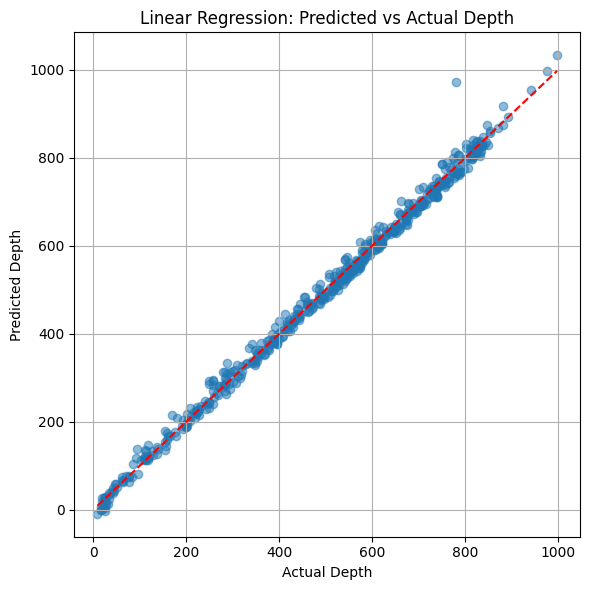

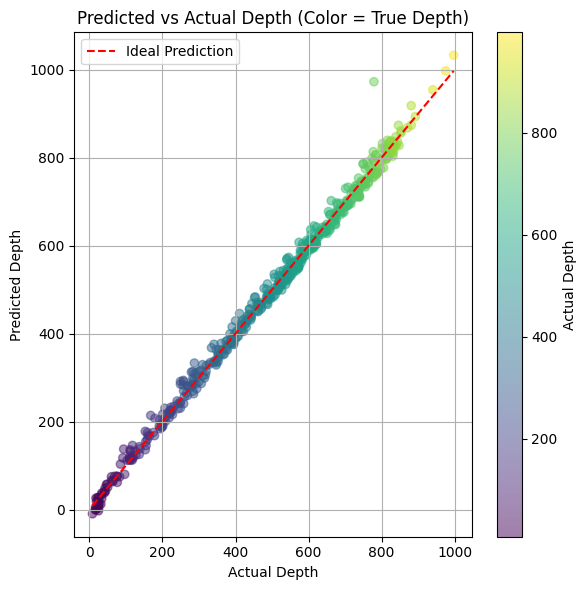

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Depth')
plt.ylabel('Predicted Depth')
plt.title('Linear Regression: Predicted vs Actual Depth')
plt.grid(True)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
scatter = plt.scatter(y_test, y_pred, c=y_test, cmap='viridis', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')

plt.xlabel('Actual Depth')
plt.ylabel('Predicted Depth')
plt.title('Predicted vs Actual Depth (Color = True Depth)')
plt.colorbar(scatter, label='Actual Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



predict the normalized depth 

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#1. Inputs x and target y
X = df_features_rs_isocortex_cosmos[['x', 'y', 'z']]
y = df_features_rs_isocortex_cosmos['depths_norm']

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R² score: 0.9947
Mean Squared Error: 0.0003


same but for all the pids 

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Collect the xyz coordinates into a full 2D array
xyz = df_features[['x', 'y', 'z']].to_numpy()

# Pass the entire array to xyz_to_depth
depths = xyz_to_depth(xyz)

# Assign the result back to the DataFrame
df_features['depths'] = depths

df_features['depths_norm'] = (
    df_features['depths'] - df_features['depths'].min()
) / (
    df_features['depths'].max() - df_features['depths'].min()
) 




df_features = df_features.dropna(subset=['depths'])
df_features = df_features.reset_index(drop=True)
df_features



#1. Inputs x and target y
X = df_features[['x', 'y', 'z']]
y = df_features['depths']

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² score: 0.0780
Mean Squared Error: 100286.9284


In [119]:
df_features

,index,pid,channel,rms_ap,cor_ratio,rms_lf,psd_delta,psd_theta,psd_alpha,psd_beta,...,y_target,z_target,atlas_id_target,labels,outside,Allen_id,Cosmos_id,Beryl_id,depths,depths_norm
0,202,00a824c0-e060-495f-9ebc-79c82fef4c67,202,0.000015,0.186398,0.000088,-92.372924,-95.150712,-97.731286,-103.352713,...,-0.002844,-0.001341,590,0.0,False,0,0,0,16.790071,0.005431
1,204,00a824c0-e060-495f-9ebc-79c82fef4c67,204,0.000015,0.324627,0.000102,-90.667452,-93.052874,-95.462705,-101.515495,...,-0.002844,-0.001322,590,0.0,False,542,315,886,26.096537,0.011017
2,206,00a824c0-e060-495f-9ebc-79c82fef4c67,206,0.000015,0.215327,0.000101,-90.226035,-92.361590,-96.223040,-102.500295,...,-0.002844,-0.001303,590,0.0,False,542,315,886,41.145805,0.020050
3,208,00a824c0-e060-495f-9ebc-79c82fef4c67,208,0.000015,0.255338,0.000090,-92.409478,-94.012445,-96.401540,-102.076750,...,-0.002844,-0.001283,590,0.0,False,542,315,886,59.616249,0.031137
4,210,00a824c0-e060-495f-9ebc-79c82fef4c67,210,0.000016,0.293725,0.000082,-94.353014,-94.002548,-97.106534,-102.941223,...,-0.002844,-0.001264,590,0.0,False,542,315,886,77.612045,0.041939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26668,383819,ff5fceaf-8247-42ab-a187-f7876441899d,372,0.000018,0.292604,0.000165,-84.294745,-89.373551,-93.813861,-100.210756,...,0.003174,-0.001768,962,0.0,False,667,315,184,280.605469,0.163785
26669,383821,ff5fceaf-8247-42ab-a187-f7876441899d,374,0.000018,0.290918,0.000163,-84.237516,-89.381776,-93.965764,-100.415922,...,0.003174,-0.001768,962,0.0,False,667,315,184,279.619629,0.163194
26670,383823,ff5fceaf-8247-42ab-a187-f7876441899d,376,0.000019,0.298159,0.000162,-84.196510,-89.541299,-94.022305,-99.737501,...,0.003174,-0.001768,962,0.0,False,667,315,184,269.545959,0.157147
26671,383827,ff5fceaf-8247-42ab-a187-f7876441899d,380,0.000019,0.279717,0.000162,-84.222207,-89.908032,-94.704802,-100.005423,...,0.003174,-0.001768,962,0.0,False,667,315,184,264.610657,0.154185


🧮 1. Polynomial Regression

In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² score: 0.9988
Mean Squared Error: 66.6374


🌲 2. Decision Tree Regressor

In [130]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² score: 0.9668
Mean Squared Error: 1894.1616


🌳 3. Random Forest Regressor

In [132]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² score: 0.9971
Mean Squared Error: 165.7765


🚀 4. Gradient Boosting Regressor (e.g., XGBoost, LightGBM, etc.)


In [134]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² score: 0.9973
Mean Squared Error: 155.5045


🧠 5. Support Vector Regression (SVR)

In [135]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')  # or 'linear', 'poly'
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² score: 0.5892
Mean Squared Error: 23407.2630


🔮 6. K-Nearest Neighbors (KNN) Regressor

In [137]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² score: 0.9952
Mean Squared Error: 272.4942


Checking if we can predict the region in Allen by the depth (.....)

In [139]:
df_features_rs_isocortex_cosmos.Allen_id.unique()

array([312782570, 312782566, 312782562,       441,      1046,       433,
             401,      1066,       281, 312782558, 312782554, 312782550,
             469,       257,       565,       501,        41,       805,
             305,        33,       778,       721,       821,       461,
               9,      1111,      1086,       670,       593, 312782624,
       312782620,      1026,       945,      1006])

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Create a new feature: predicted depth
df_features_rs_isocortex_cosmos['depth_pred'] = model.predict(X)

# 2. Prepare data for classification
X_class = df_features_rs_isocortex_cosmos[['depth_pred']]
y_class = df_features_rs_isocortex_cosmos['Allen_id']  # assuming this is a column of ints or labels

# 3. Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# 4. Train a classifier
clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

# 5. Predict and evaluate
y_pred_c = clf.predict(X_test_c)
acc = accuracy_score(y_test_c, y_pred_c)

print(f"Classification Accuracy from predicted depth: {acc:.4f}")


Classification Accuracy from predicted depth: 0.4432


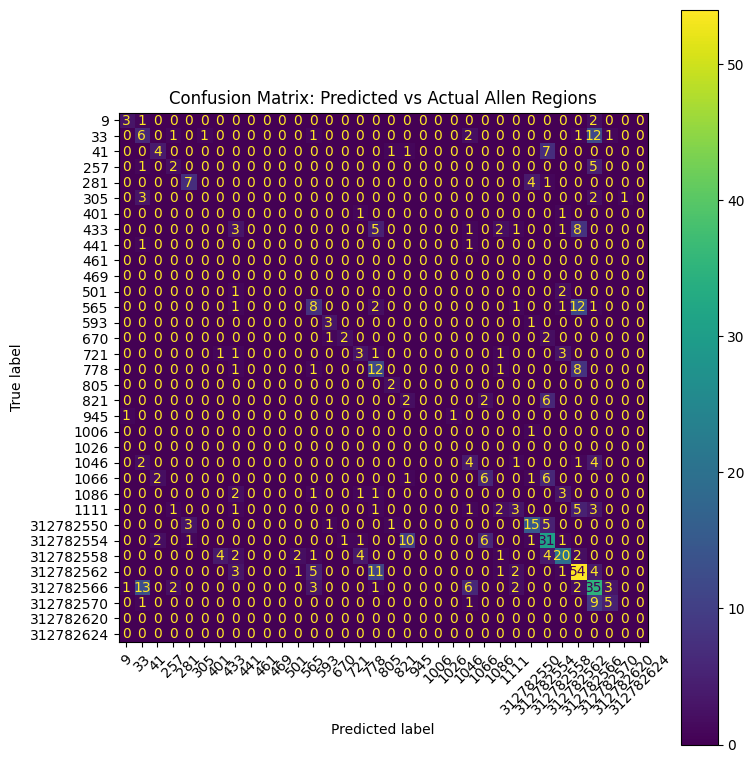

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming:
# y_test_c = true Allen IDs
# y_pred_c = predicted Allen IDs from classifier

cm = confusion_matrix(y_test_c, y_pred_c, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='viridis', xticks_rotation=45)
plt.title('Confusion Matrix: Predicted vs Actual Allen Regions')
plt.tight_layout()
plt.show()


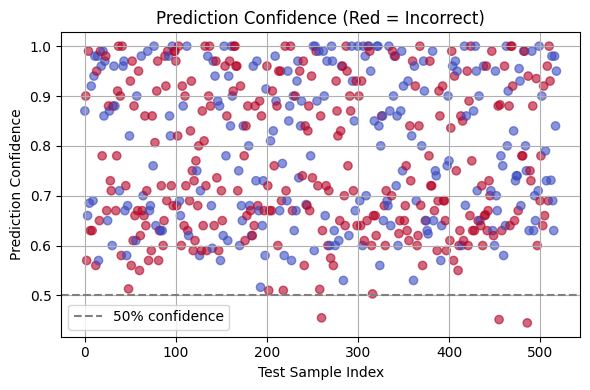

In [149]:
# Get prediction probabilities
probs = clf.predict_proba(X_test_c)
confidence = probs.max(axis=1)  # highest class prob per prediction

# Scatter plot with confidence coloring
plt.figure(figsize=(6, 4))
plt.scatter(range(len(confidence)), confidence, c=(y_pred_c != y_test_c), cmap='coolwarm', alpha=0.6)
plt.axhline(0.5, linestyle='--', color='gray', label='50% confidence')
plt.xlabel('Test Sample Index')
plt.ylabel('Prediction Confidence')
plt.title('Prediction Confidence (Red = Incorrect)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_153821/2126389374.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='Allen_id', y='Depth', inner='quartile', palette='viridis')


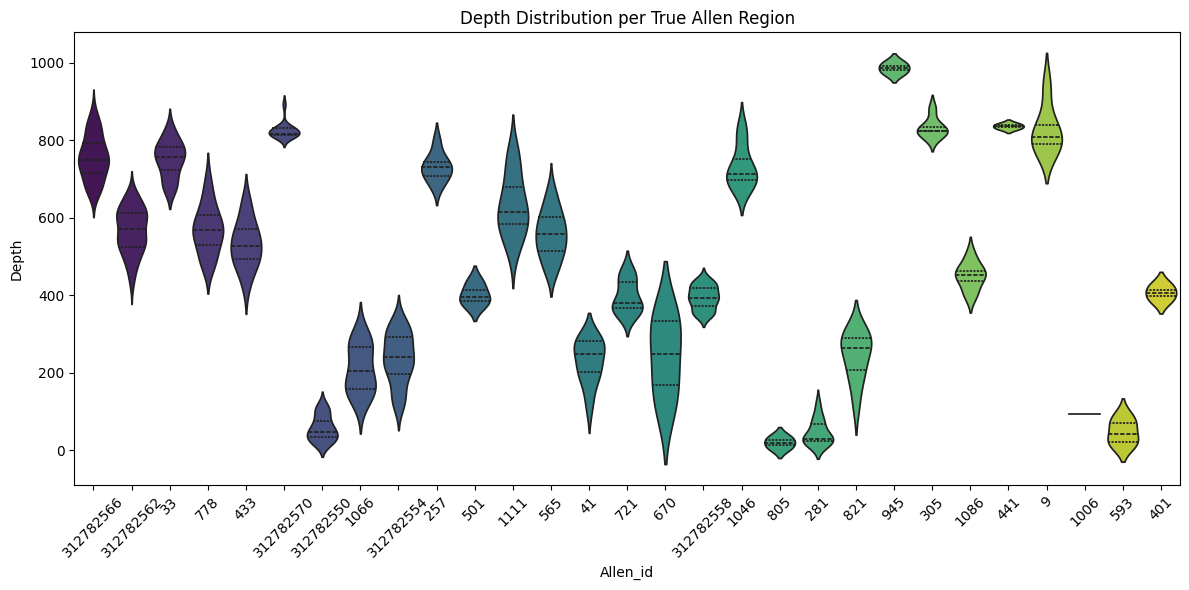

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Allen_id is categorical for plotting clarity
df_features_rs_isocortex_cosmos['Allen_id'] = df_features_rs_isocortex_cosmos['Allen_id'].astype(str)

# Extract test set depths and true labels
depths_test = df_features_rs_isocortex_cosmos.loc[y_test_c.index, 'depths']
true_labels = y_test_c.astype(str)  # convert to string labels if necessary

# Combine into one DataFrame for plotting
import pandas as pd
plot_df = pd.DataFrame({
    'Allen_id': true_labels,
    'Depth': depths_test
})

plt.figure(figsize=(12, 6))
sns.violinplot(data=plot_df, x='Allen_id', y='Depth', inner='quartile', palette='viridis')
plt.xticks(rotation=45)
plt.title('Depth Distribution per True Allen Region')
plt.tight_layout()
plt.show()


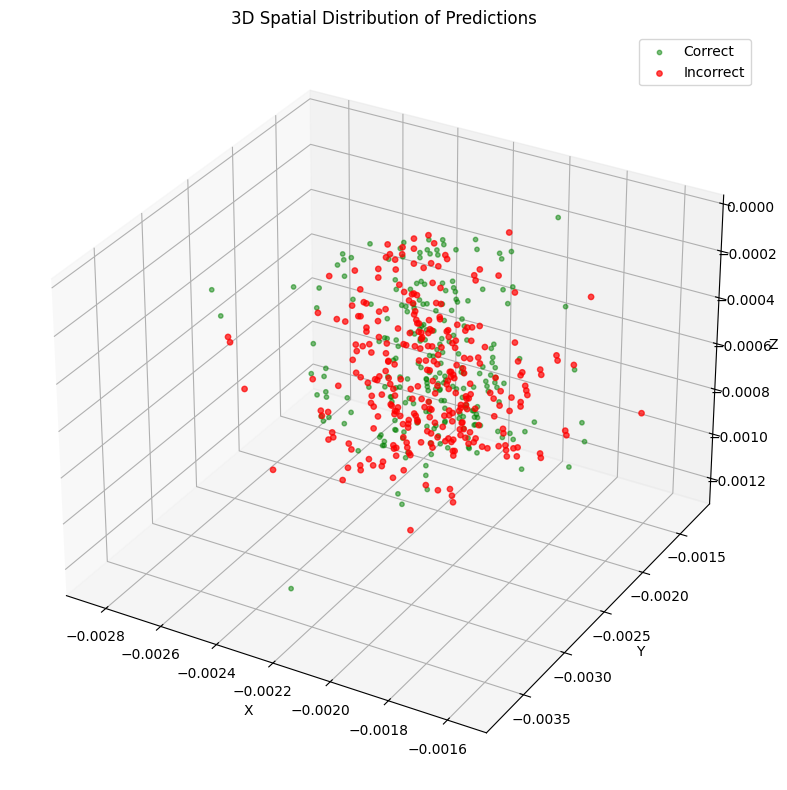

In [151]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Match data from test set
test_idx = y_test_c.index
X_test_xyz = df_features_rs_isocortex_cosmos.loc[test_idx, ['x', 'y', 'z']]
true_labels = y_test_c
pred_labels = pd.Series(y_pred_c, index=test_idx)

# Correct vs incorrect mask
correct_mask = (true_labels == pred_labels)

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot correct predictions
ax.scatter(
    X_test_xyz[correct_mask]['x'],
    X_test_xyz[correct_mask]['y'],
    X_test_xyz[correct_mask]['z'],
    c='green', label='Correct', alpha=0.5, s=10
)

# Plot incorrect predictions
ax.scatter(
    X_test_xyz[~correct_mask]['x'],
    X_test_xyz[~correct_mask]['y'],
    X_test_xyz[~correct_mask]['z'],
    c='red', label='Incorrect', alpha=0.7, s=15
)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Spatial Distribution of Predictions')
ax.legend()
plt.tight_layout()
plt.show()


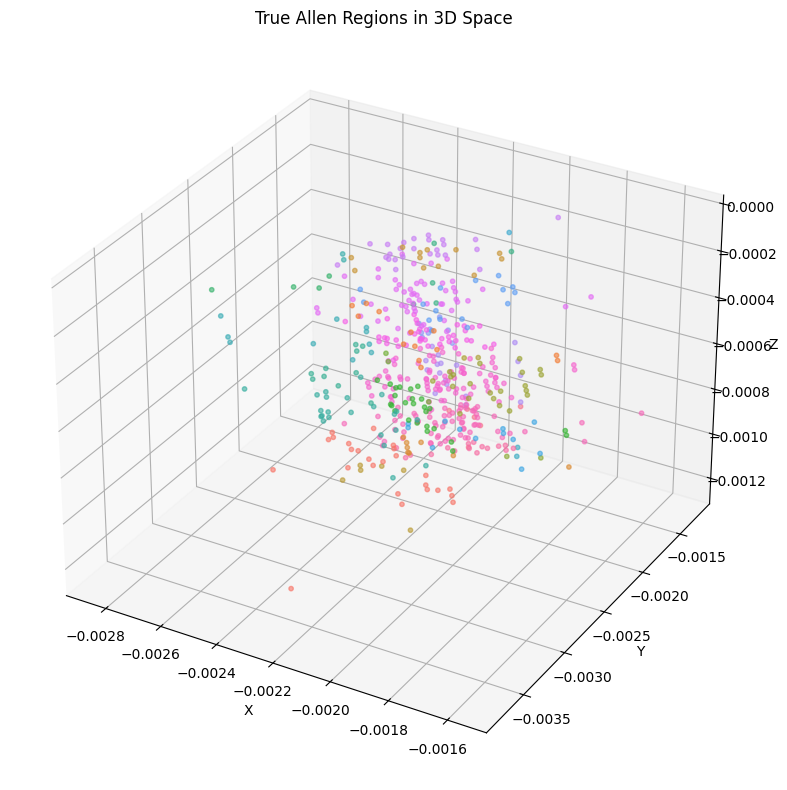

In [152]:
import seaborn as sns

# Assign a unique color to each Allen region
unique_labels = sorted(true_labels.unique())
palette = sns.color_palette("husl", len(unique_labels))
label_to_color = {label: palette[i] for i, label in enumerate(unique_labels)}
colors = true_labels.map(label_to_color)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_test_xyz['x'], X_test_xyz['y'], X_test_xyz['z'],
    c=colors, alpha=0.6, s=10
)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('True Allen Regions in 3D Space')
plt.tight_layout()
plt.show()


NOW TRYING DF_FEATURES FOR ALL THE PIDS WITHOUT ONLY BEING THE RS

In [180]:
df_features = df_features.reset_index() 
df_features

,level_0,index,pid,channel,rms_ap,cor_ratio,rms_lf,psd_delta,psd_theta,psd_alpha,...,lateral_um,x_target,y_target,z_target,atlas_id_target,labels,outside,Allen_id,Cosmos_id,Beryl_id
0,0,0,00a824c0-e060-495f-9ebc-79c82fef4c67,0,0.000026,0.754190,0.000029,-101.787283,-104.159496,-105.973834,...,43.0,-0.000352,-0.002844,-0.003299,795,2.0,False,128,313,128
1,1,1,00a824c0-e060-495f-9ebc-79c82fef4c67,1,0.000026,0.411007,0.000030,-101.573927,-104.459178,-106.397486,...,11.0,-0.000352,-0.002844,-0.003299,795,0.0,False,128,313,128
2,2,2,00a824c0-e060-495f-9ebc-79c82fef4c67,2,0.000026,0.451987,0.000031,-101.712161,-104.223009,-106.204256,...,59.0,-0.000357,-0.002844,-0.003279,795,0.0,False,128,313,128
3,3,3,00a824c0-e060-495f-9ebc-79c82fef4c67,3,0.000026,0.469155,0.000041,-97.225263,-102.353363,-104.408635,...,27.0,-0.000357,-0.002844,-0.003279,795,0.0,False,128,313,128
4,4,4,00a824c0-e060-495f-9ebc-79c82fef4c67,4,0.000026,0.338838,0.000033,-99.494953,-104.781015,-106.740744,...,43.0,-0.000362,-0.002844,-0.003260,795,0.0,False,128,313,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384210,384210,384210,ffb1b072-2de7-44a4-8115-5799b9866382,379,0.000038,0.788894,0.000045,-96.893853,-101.622061,-104.861699,...,27.0,0.001347,-0.006209,-0.003445,512,0.0,False,1025,512,1025
384211,384211,384211,ffb1b072-2de7-44a4-8115-5799b9866382,380,0.000038,0.766668,0.000047,-96.756403,-101.407902,-104.768071,...,43.0,0.001350,-0.006209,-0.003426,512,0.0,False,1025,512,1025
384212,384212,384212,ffb1b072-2de7-44a4-8115-5799b9866382,381,0.000038,0.744558,0.000046,-97.154323,-101.746486,-104.903059,...,11.0,0.001350,-0.006209,-0.003426,512,0.0,False,1025,512,1025
384213,384213,384213,ffb1b072-2de7-44a4-8115-5799b9866382,382,0.000038,0.696702,0.000048,-96.286040,-101.416863,-104.826851,...,59.0,0.001353,-0.006209,-0.003406,512,0.0,False,1025,512,1025


In [181]:
df_features_isocortex_cosmos = df_features[df_features['Cosmos_id'] == 315] 
df_features_isocortex_cosmos = df_features_isocortex_cosmos.reset_index(drop=True) 
df_features_isocortex_cosmos

,level_0,index,pid,channel,rms_ap,cor_ratio,rms_lf,psd_delta,psd_theta,psd_alpha,...,lateral_um,x_target,y_target,z_target,atlas_id_target,labels,outside,Allen_id,Cosmos_id,Beryl_id
0,204,204,00a824c0-e060-495f-9ebc-79c82fef4c67,204,0.000015,0.324627,0.000102,-90.667452,-93.052874,-95.462705,...,43.0,-0.000857,-0.002844,-0.001322,590,0.0,False,542,315,886
1,205,205,00a824c0-e060-495f-9ebc-79c82fef4c67,205,0.000015,0.223870,0.000089,-93.064040,-94.215528,-96.759077,...,11.0,-0.000857,-0.002844,-0.001322,590,0.0,False,542,315,886
2,206,206,00a824c0-e060-495f-9ebc-79c82fef4c67,206,0.000015,0.215327,0.000101,-90.226035,-92.361590,-96.223040,...,59.0,-0.000862,-0.002844,-0.001303,590,0.0,False,542,315,886
3,207,207,00a824c0-e060-495f-9ebc-79c82fef4c67,207,0.000015,0.315951,0.000091,-92.343828,-94.833368,-97.613534,...,27.0,-0.000862,-0.002844,-0.001303,590,0.0,False,542,315,886
4,208,208,00a824c0-e060-495f-9ebc-79c82fef4c67,208,0.000015,0.255338,0.000090,-92.409478,-94.012445,-96.401540,...,43.0,-0.000867,-0.002844,-0.001283,590,0.0,False,542,315,886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63324,383826,383826,ff5fceaf-8247-42ab-a187-f7876441899d,379,0.000019,0.292517,0.000161,-84.312174,-89.606102,-94.125836,...,27.0,-0.001650,0.003174,-0.001768,962,0.0,False,667,315,184
63325,383827,383827,ff5fceaf-8247-42ab-a187-f7876441899d,380,0.000019,0.279717,0.000162,-84.222207,-89.908032,-94.704802,...,43.0,-0.001650,0.003174,-0.001768,962,0.0,False,667,315,184
63326,383828,383828,ff5fceaf-8247-42ab-a187-f7876441899d,381,0.000019,0.308452,0.000162,-84.223564,-89.877630,-94.478351,...,11.0,-0.001650,0.003174,-0.001768,962,0.0,False,667,315,184
63327,383829,383829,ff5fceaf-8247-42ab-a187-f7876441899d,382,0.000019,0.296210,0.000159,-84.318868,-90.165487,-95.044300,...,59.0,-0.001650,0.003174,-0.001768,962,0.0,False,667,315,184


In [182]:
# Collect the xyz coordinates into a full 2D array
xyz = df_features_isocortex_cosmos[['x', 'y', 'z']].to_numpy()

# Pass the entire array to xyz_to_depth
depths = xyz_to_depth(xyz)

# Assign the result back to the DataFrame
df_features_isocortex_cosmos['depths'] = depths

In [183]:
df_features_isocortex_cosmos['depths_norm'] = (
    df_features_isocortex_cosmos['depths'] - df_features_isocortex_cosmos['depths'].min()
) / (
    df_features_isocortex_cosmos['depths'].max() - df_features_isocortex_cosmos['depths'].min()
)

df_features_isocortex_cosmos = df_features_isocortex_cosmos.dropna(subset=['depths'])
df_features_isocortex_cosmos = df_features_isocortex_cosmos.reset_index(drop=True)
df_features_isocortex_cosmos


,level_0,index,pid,channel,rms_ap,cor_ratio,rms_lf,psd_delta,psd_theta,psd_alpha,...,y_target,z_target,atlas_id_target,labels,outside,Allen_id,Cosmos_id,Beryl_id,depths,depths_norm
0,204,204,00a824c0-e060-495f-9ebc-79c82fef4c67,204,0.000015,0.324627,0.000102,-90.667452,-93.052874,-95.462705,...,-0.002844,-0.001322,590,0.0,False,542,315,886,26.096537,0.010887
1,206,206,00a824c0-e060-495f-9ebc-79c82fef4c67,206,0.000015,0.215327,0.000101,-90.226035,-92.361590,-96.223040,...,-0.002844,-0.001303,590,0.0,False,542,315,886,41.145805,0.019921
2,208,208,00a824c0-e060-495f-9ebc-79c82fef4c67,208,0.000015,0.255338,0.000090,-92.409478,-94.012445,-96.401540,...,-0.002844,-0.001283,590,0.0,False,542,315,886,59.616249,0.031010
3,210,210,00a824c0-e060-495f-9ebc-79c82fef4c67,210,0.000016,0.293725,0.000082,-94.353014,-94.002548,-97.106534,...,-0.002844,-0.001264,590,0.0,False,542,315,886,77.612045,0.041813
4,214,214,00a824c0-e060-495f-9ebc-79c82fef4c67,214,0.000016,0.267512,0.000071,-93.990335,-96.277048,-99.074600,...,-0.002844,-0.001225,971,0.0,False,430,315,886,92.787430,0.050923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26012,383819,383819,ff5fceaf-8247-42ab-a187-f7876441899d,372,0.000018,0.292604,0.000165,-84.294745,-89.373551,-93.813861,...,0.003174,-0.001768,962,0.0,False,667,315,184,280.605469,0.163676
26013,383821,383821,ff5fceaf-8247-42ab-a187-f7876441899d,374,0.000018,0.290918,0.000163,-84.237516,-89.381776,-93.965764,...,0.003174,-0.001768,962,0.0,False,667,315,184,279.619629,0.163084
26014,383823,383823,ff5fceaf-8247-42ab-a187-f7876441899d,376,0.000019,0.298159,0.000162,-84.196510,-89.541299,-94.022305,...,0.003174,-0.001768,962,0.0,False,667,315,184,269.545959,0.157036
26015,383827,383827,ff5fceaf-8247-42ab-a187-f7876441899d,380,0.000019,0.279717,0.000162,-84.222207,-89.908032,-94.704802,...,0.003174,-0.001768,962,0.0,False,667,315,184,264.610657,0.154074


In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#1. Inputs x and target y
X = df_features_isocortex_cosmos[['x', 'y', 'z']]
y = df_features_isocortex_cosmos['depths']

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R² score: 0.0755
Mean Squared Error: 99476.3355


/tmp/ipykernel_153821/2228531499.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




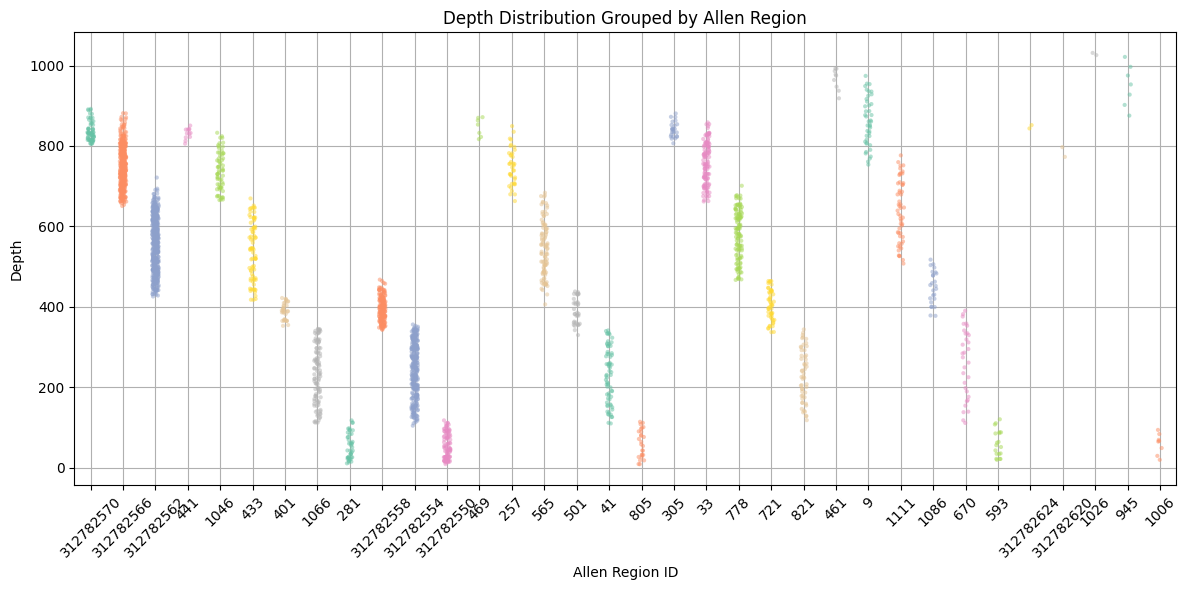

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure Allen_id is categorical (for ordering + aesthetics)
df_features_rs_isocortex_cosmos['Allen_id'] = df_features_rs_isocortex_cosmos['Allen_id'].astype(str)

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_features_rs_isocortex_cosmos,
    x='Allen_id',
    y='depths',
    jitter=True,
    alpha=0.5,
    size=3,
    palette='Set2'
)

plt.xticks(rotation=45)
plt.xlabel('Allen Region ID')
plt.ylabel('Depth')
plt.title('Depth Distribution Grouped by Allen Region')
plt.tight_layout()
plt.grid(True)
plt.show()


/tmp/ipykernel_153821/3224856384.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




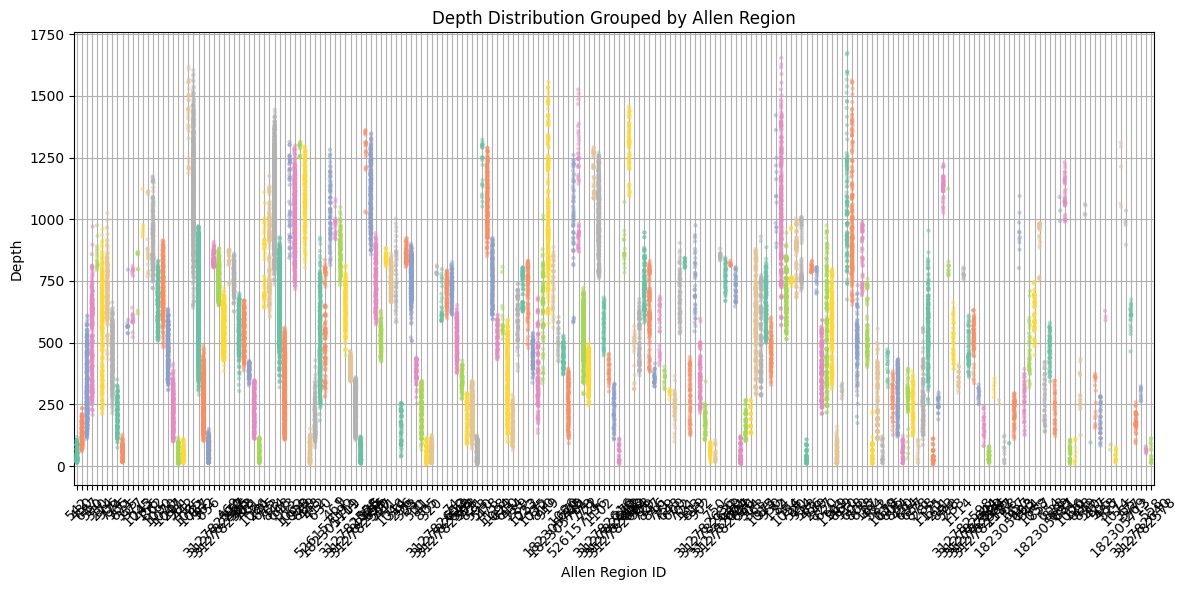

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure Allen_id is categorical (for ordering + aesthetics)
df_features_isocortex_cosmos['Allen_id'] = df_features_isocortex_cosmos['Allen_id'].astype(str)

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_features_isocortex_cosmos,
    x='Allen_id',
    y='depths',
    jitter=True,
    alpha=0.5,
    size=3,
    palette='Set2'
)

plt.xticks(rotation=45)
plt.xlabel('Allen Region ID')
plt.ylabel('Depth')
plt.title('Depth Distribution Grouped by Allen Region')
plt.tight_layout()
plt.grid(True)
plt.show()


testing other models

In [196]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#1. Inputs x and target y
X = df_features_isocortex_cosmos[['x', 'y', 'z']]
y = df_features_isocortex_cosmos['depths']

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R² score: 0.5238
Mean Squared Error: 51237.6552


In [ ]:
#1. Inputs x and target y
X = df_features_isocortex_cosmos[['x', 'y', 'z']]
y = df_features_isocortex_cosmos['depths']

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R² score: 0.4618
Mean Squared Error: 57912.6703


In [198]:
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge,
    HuberRegressor
)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Prepare input
X = df_features_isocortex_cosmos[['x', 'y', 'z']]
y = df_features_isocortex_cosmos['depths']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor()
}

# 4. Fit & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: R² = {r2:.4f}, MSE = {mse:.4f}")


LinearRegression: R² = 0.0755, MSE = 99476.3355
Ridge: R² = 0.0095, MSE = 106577.9201
Lasso: R² = 0.0743, MSE = 99604.0227
ElasticNet: R² = -0.0014, MSE = 107749.0514
BayesianRidge: R² = 0.0755, MSE = 99475.9377
HuberRegressor: R² = 0.0664, MSE = 100454.9769


In [199]:
# Standard imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Data
X = df_features_isocortex_cosmos[['x', 'y', 'z']]
y = df_features_isocortex_cosmos['depths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🌲 2. Tree-Based Models

In [200]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

tree_models = {
    "DecisionTree": DecisionTreeRegressor(max_depth=5),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

for name, model in tree_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: R² = {r2_score(y_test, y_pred):.4f}, MSE = {mean_squared_error(y_test, y_pred):.4f}")


DecisionTree: R² = 0.4618, MSE = 57912.6703
RandomForest: R² = 0.9964, MSE = 392.7077
ExtraTrees: R² = 0.9983, MSE = 186.8420


🚀 3. Boosting Frameworks

In [201]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

boost_models = {
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

for name, model in boost_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: R² = {r2_score(y_test, y_pred):.4f}, MSE = {mean_squared_error(y_test, y_pred):.4f}")


GradientBoosting: R² = 0.7978, MSE = 21753.1972
HistGradientBoosting: R² = 0.9751, MSE = 2678.9342


🧠 4. Support Vector Machines

In [202]:
from sklearn.svm import SVR

svm_models = {
    "SVR (RBF kernel)": SVR(kernel='rbf'),
    "SVR (Linear kernel)": SVR(kernel='linear')
}

for name, model in svm_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: R² = {r2_score(y_test, y_pred):.4f}, MSE = {mean_squared_error(y_test, y_pred):.4f}")


SVR (RBF kernel): R² = 0.4610, MSE = 57990.9378
SVR (Linear kernel): R² = -0.0000, MSE = 107599.0715


👟 5. Nearest Neighbors

In [203]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(f"KNN Regressor: R² = {r2_score(y_test, y_pred):.4f}, MSE = {mean_squared_error(y_test, y_pred):.4f}")


KNN Regressor: R² = 0.9955, MSE = 486.1236


🧠 7. Neural Network

In [204]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
print(f"MLPRegressor: R² = {r2_score(y_test, y_pred):.4f}, MSE = {mean_squared_error(y_test, y_pred):.4f}")


MLPRegressor: R² = 0.2154, MSE = 84423.6303


/mnt/h0/kb/code_kcenia/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



ALL MODELS 

In [205]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# -------------------- Data --------------------
X = df_features_isocortex_cosmos[['x', 'y', 'z']]
y = df_features_isocortex_cosmos['depths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- Models --------------------
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, HistGradientBoostingRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor

models = {
    # 1. Linear models
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(),

    # 2. Tree-based models
    "DecisionTree": DecisionTreeRegressor(max_depth=5),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=42),

    # 3. Boosting
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100),
    "HistGradientBoosting": HistGradientBoostingRegressor(),

    # 4. SVM
    "SVR (RBF kernel)": SVR(kernel='rbf'),
    "SVR (Linear kernel)": SVR(kernel='linear'),

    # 5. KNN
    "KNeighbors": KNeighborsRegressor(n_neighbors=5),

    # 6. Gaussian Process
    "GaussianProcess": GaussianProcessRegressor(),

    # 7. Neural Network
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
}

# -------------------- Benchmark Loop --------------------
results = []

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        results.append({"Model": name, "R² Score": r2, "MSE": mse})
    except Exception as e:
        results.append({"Model": name, "R² Score": None, "MSE": None})
        print(f"⚠️ {name} failed: {e}")

# -------------------- Results Table --------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R² Score", ascending=False).reset_index(drop=True)

import ace_tools as tools; tools.display_dataframe_to_user(name="Regression Model Benchmark", dataframe=results_df)


/mnt/h0/kb/code_kcenia/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



ModuleNotFoundError: No module named 'ace_tools'